# Introduction to Quantum Computing
---

Quantum computers, or more precisely, quantum processing units (QPUs), are devices that exploit quantum-mechanical effects to perform computations that are not feasible through the use of conventional (classical) computers. Therefore, in order to understand how these devices work, we must familiarize ourselves with the quantum phenomena that enables this added computational advantage. In particular, we must understand the concepts of [superposition](https://en.wikipedia.org/wiki/Quantum_superposition), [entanglement](https://en.wikipedia.org/wiki/Quantum_entanglement) and [quantum interference](https://en.wikipedia.org/wiki/Wave_interference#Quantum_interference).

For this reason, in this chapter we will follow a bottom-up approach. Instead of starting by describing how QPUs can outperform classical devices in certain tasks, we will first introduce the concept of a qubit by discussing how this fundamental element of computation emerges from some of the physical properties of particles like electrons.

## 1. Quantum Bits (Qubits)

From a computation standpoint, qubits are a generalization of classical bits, and are the fundamental unit in quantum computing. There are many different ways in which we can introduce the concept of a qubit. Here, we will follow a relatively intuitive approach by looking at how electrons behave under the influence of an external magnetic field.

One of fundamental properties of electrons is that they have an intrinsic angular momentum. This property is commonly known as spin, even though particles are not really spinning. The spin of an electron can be deduced experimentally by using what is known as a [Stern-Gerlach](https://en.wikipedia.org/wiki/Stern%E2%80%93Gerlach_experiment) apparatus. This device consists of two magnet poles shaped in a way such that the magnetic field between them is non-uniform, having a higher intensity at the top where the magnet is sharper: 

<img src="images\02_01_01_stern-gerlach_field.png" align = "center" width="600"/>

Therefore, if an object with a magnetic moment, like a tiny bar magnet, is sent into this device along the $y$ direction, it will experience a force in the vertical $z$ direction that will cause it to deflect upwards or downwards. A bar magnet with its north pole pointing up will deflect upwards; on the other hand, a bar magnet with its north pole pointing down will deflect downwards:

<img src="images\02_01_02_stern-gerlach_n-s_magnets.png" align = "center" width="700"/>

If designed correctly, a bar magnet with its north pointing in the $\texttt{+}x$ (or $\texttt{-}x$ direction) should experience an equal force from the top and bottom magnet poles, and therefore should travel in a straight path: 
<img src="images\02_01_03_stern-gerlach_straight_magnet.png" align = "center" width="300"/>


More generally, the force experienced by the bar magnet depends on the angle $\theta$ between its magnetic moment (i.e., where its north pole points to) and the direction of the external magnetic field. Therefore, if we were to perform this experiment for bar magnets with varying angles in the magnetic moment, the z-axis landing location on the back screen $l_z$ will vary between where the landing position of the up-pointing and down-pointing magnets, and will be dependent on the angle $\theta$ such that: $ l_z \propto cos\left(\theta\right) $.

<img src="images\02_01_04_stern-gerlach_diff_magnet.png" align = "center" width="320"/>
<br></br>

We can verify this for the few examples we have considered:

| Bar's North Direction | Angle $\theta$ [rad] | Angle $\theta$ [deg] | $l_z \propto \cos(\theta)$ 
| :-: | :-: | :-: | :-: |
| $\texttt{+}z$ | $0$ | $0$ | $\phantom{\texttt{-}}1$ |
| $\texttt{-}z$ | $\pi$ | $180$ | $\texttt{-}1$ |
| $\texttt{+}x$ | $\frac{\pi}{2}$ | $90$ | $\phantom{\texttt{-}}0$ |
| $\texttt{-}x$ | $\frac{3\pi}{2}$ | $270$ | $\phantom{\texttt{-}}0$ |

Now, because electrons are charge particles, their intrinsic angular momentum (spin) expresses itself as a magnetic moment just as we have for a tiny bar magnet. So, if we replace the magnets with electrons in the experiment above$^*$, the expectation is that we should see the exact same behavior of electrons being deflected in the $z$ direction as a function of the angle between the electron's magnetic moment and the direction of the external magnetic field.

Experimentally, this has been confirmed for electrons with their spin pointing in the $\texttt{+}z$ and $\texttt{-}z$ directions:
<img src="images\02_01_05_stern-gerlach_up-down_elec.png" align = "center" width="700"/>

However, for the case of an electron with their spin pointing in the $\texttt{+}x$ (or $\texttt{-}x$) direction, something interesting happens. Instead of traveling in a straight line (like in the case of the bar magnet), the electron deflects upwards or downwards with $50 \%$ probability:
<img src="images\02_01_06_stern-gerlach_right_elec.png" align = "center" width="360"/>

What this implies is that, if we were to run this experiment many times, roughly half of the time we will see the electron deflecting upwards, and half of the time deflecting downwards. More generally, what experiments show is that the probability of the electron deflecting in the $\texttt{+}z$ direction is given by the cosine squared of the angle $\theta/2$, where again, $\theta$ is the angle between the spin and the direction of the magnetic field:

$$ P_{\texttt{+}z} = \cos^2\left(\frac{\theta}{2}\right) $$

Similarly, the probability of the electron deflecting in the $\texttt{-}z$ direction is equal the sine squared of the angle:

$$ P_{\texttt{-}z} = \sin^2\left(\frac{\theta}{2}\right) $$

From a probability standpoint, these expressions work since the sum of sine and cosine squared for any common angle always add to one, just like probabilities ought to do:

$$
\begin{aligned}
P_{\texttt{+}z} &+ P_{\texttt{-}z} = 1
\\
\\
\cos^2\left(\frac{\theta}{2}\right) &+ \sin^2\left(\frac{\theta}{2}\right) = 1
\end{aligned}
$$

Furthermore, we can verify that these expressions work for the four cases we have considered:

| Spin Direction | Angle $\theta$ [rad] | Angle $\theta$ [deg] | $P_{\texttt{+}z}$ | $P_{\texttt{0}z}$ |
| :-: | :-: | :-: | :-: | :-: |
| $\texttt{+}z$ | $0$ | $0$ | $1$ | $0$ |
| $\texttt{-}z$ | $\pi$ | $180$ | $0$ | $1$ |
| $\texttt{+}x$ | $\frac{\pi}{2}$ | $90$ | $\frac{1}{2}$ | $\frac{1}{2}$ |
| $\texttt{-}x$ | $\frac{3\pi}{2}$ | $270$ | $\frac{1}{2}$ | $\frac{1}{2}$ |

But more importantly, experiments simply show that this works for any angle $\theta$.
<img src="images\02_01_07_stern-gerlach_angle_elec.png" align = "center" width="360"/>
<br></br>

Let's now use Python to plot the probabilities $P_{\texttt{+}z}$, $P_{\texttt{-}z}$ as a function of $\theta$.

<span style="font-size: smaller;">$^*$Technically, we can't really perform the standard Stern-Gerlach experiment using just electrons. Since electrons are charged particles, accelerating them into the apparatus will cause a classical [Lorentz force](https://en.wikipedia.org/wiki/Lorentz_force) that will dominate over the effect the magnetic field has on spin. Instead, in the original experiment, silver atoms where used because they are electrically neutral but still have spin-1/2 due to the presence of an unpaired electron in the outermost orbital.

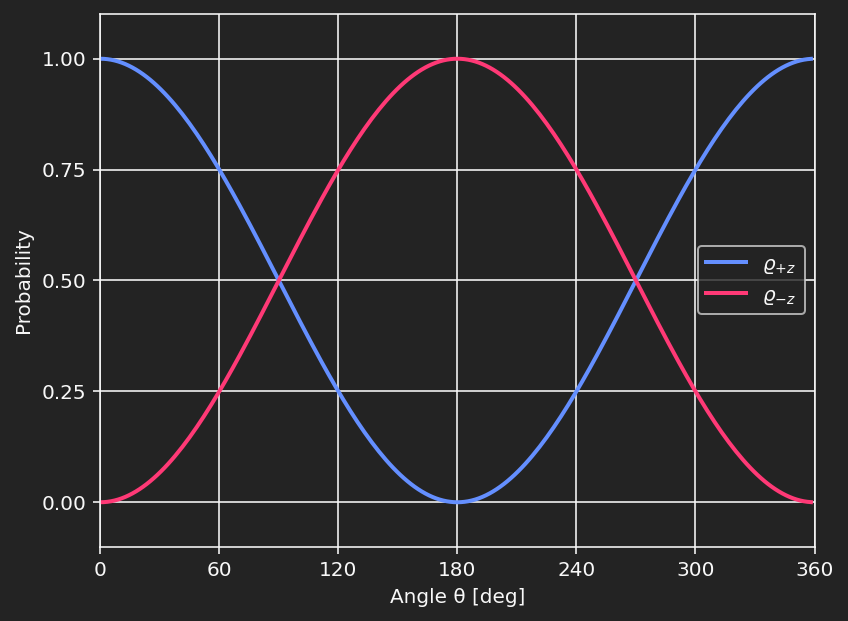

In [1]:
import numpy as np
from matplotlib import pyplot as plt

θ = np.arange(0,2*np.pi,np.pi/100)
Ppz = np.cos(θ/2)**2
Pmz = np.sin(θ/2)**2

plt.plot(180*θ/np.pi, ϱpz, linewidth=2, label='$P_{+z}$')
plt.plot(180*θ/np.pi, ϱmz, linewidth=2, label='$P_{-z}$')

plt.xlim(0,360)
plt.xticks(np.arange(0, 361, 60))
plt.xlabel('Angle θ [deg]')
plt.ylim(-0.1,1.1)
plt.yticks(np.arange(0, 1.1, 0.25))
plt.ylabel('Probability')

plt.legend()
plt.grid()
plt.show()

The reason why electrons show this probabilistic response is partially related to what is perhaps the most debated question in all quantum mechanics: [the measurement problem](https://en.wikipedia.org/wiki/Measurement_problem). Therefore, we will just take this behavior as a given fact purely based on empirical data.
<br></br>

Given this behavior, it is then very tempting to assign a probability vector (like the ones described in the [previous chapter](../01_classical_computing/01_04_probabilistic_circuits.ipynb)) to describe the state of the spin of an electron:

$$ 
\begin{aligned}
\vec{s}_z &= \begin{bmatrix}P_{\texttt{+}z} \\ P_{\texttt{-}z} \end{bmatrix} 
\\
\\
\vec{s}_z &= \begin{bmatrix}\cos^2\left(\frac{\theta}{2}\right) \\ \sin^2\left(\frac{\theta}{2}\right) \end{bmatrix} 
\end{aligned}
$$

Clearly, this works for the specific case of the Stern-Gerlach experiment we described above, but does it work in general?... No.

Let's now consider a modified version of the Stern-Gerlach experiment, where right after the first apparatus, but before the screen, we introduce another set of magnets to bend the electron's path back towards the center.